In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68390_I')

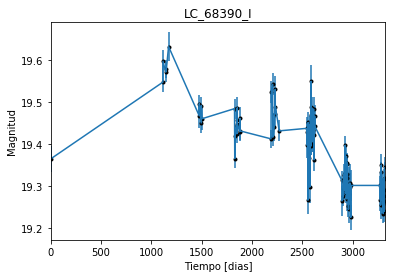

In [2]:
data = np.genfromtxt('LC_68390_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68390_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

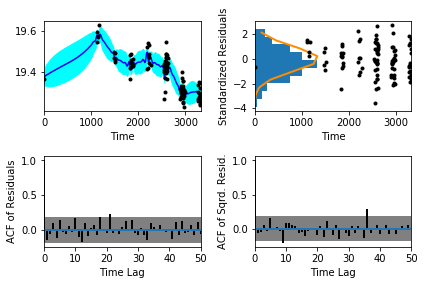

In [5]:
sample.assess_fit()

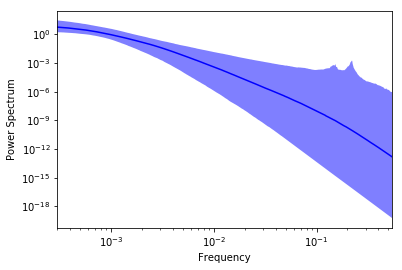

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68390_I')

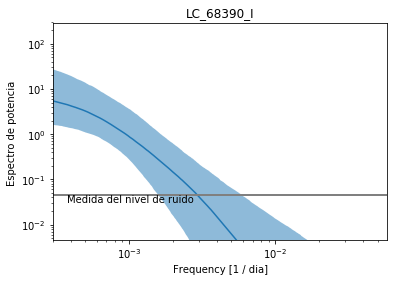

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68390_I')

Text(0.5,1,'Prediccion , valor esperado 68390_I')

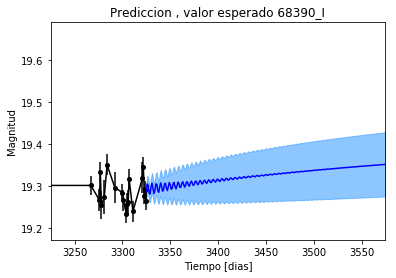

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 68390_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_68390_I')

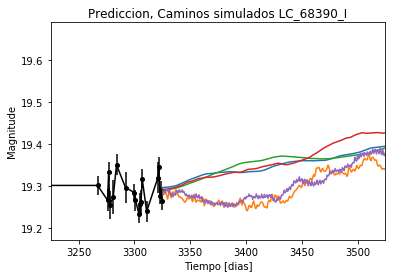

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68390_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68390_I')

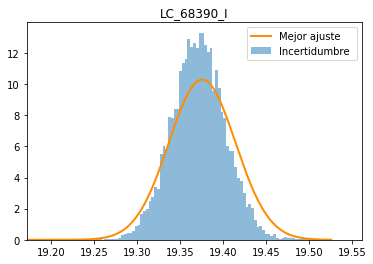

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68390_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_I')

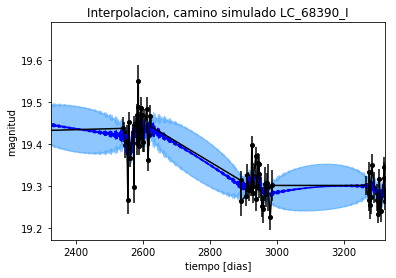

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_I')

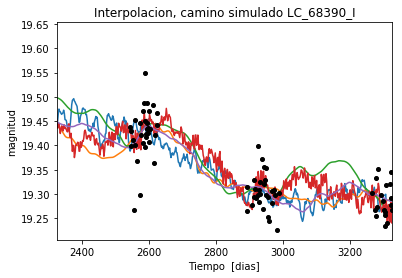

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_I')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 332.561579828
Median: 0.010028572133
Standard deviation: 0.20413199248
68% credibility interval: [ 0.00077292  0.20563361]
95% credibility interval: [  3.48600482e-04   7.89602212e-01]
99% credibility interval: [  3.15939266e-04   9.73841322e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 545.869483153
Median: 0.00105094876671
Standard deviation: 0.0679983049762
68% credibility interval: [ 0.00040187  0.01208637]
95% credibility interval: [ 0.00031488  0.20188124]
99% credibility interval: [  3.04245740e-04   4.69645009e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 192.239469868
Median: 0.0414742721018
Standard de

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 658.146840067
Median: 252.254993869
Standard deviation: 1.64583827411
68% credibility interval: [ 250.57431053  253.25472996]
95% credibility interval: [ 248.04034169  255.42284755]
99% credibility interval: [ 246.10325009  256.40632528]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.919019574
Median: 0.867768727136
Standard deviation: 2.25842772264
68% credibility interval: [ 0.06737341  4.3769028 ]
95% credibility interval: [ 0.01441926  7.18781717]
99% credibility interval: [ 0.0096974   9.63249452]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 543.225280709
Median: 0.469523411013
Standard deviation: 8.45130281906
68% credibility interval: [ 0.01333888  6.58713629]
95% credibility interval: [  9.59124759e-0

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3679.8287782
Median: 3.38712769849e-28
Standard deviation: 3.94996338744e+44
68% credibility interval: [  8.95107805e-69   2.37204993e-05]
95% credibility interval: [  4.62488734e-91   2.83038531e+01]
99% credibility interval: [  5.13230973e-108   1.16437244e+026]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2241.37076345
Median: 19.4125574237
Standard deviation: 0.0582452689521
68% credibility interval: [ 19.36155934  19.46224051]
95% credibility interval: [ 19.2973954   19.52720582]
99% credibility interval: [ 19.22243691  19.61047403]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 312.327039652
Median: 0.000538357773417
Standard deviation: 0.228622530148
68% credibility interval: [ 0.          0.26713472]
95% credibility interval: [ 0.          0.86260343]
99% credibility interval: [ 0.          1.02736104]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 312.327039652
Median: 0.000538357773417
Standard deviation: 0.228622530148
68% credibility interval: [ 0.          0.26713472]
95% credibility interval: [ 0.          0.86260343]
99% credibility interval: [ 0.          1.02736104]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 507.432505847
Median: 0.0
Standard deviation: 0.000177371880245
68

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 658.146840067
Median: 252.254993869
Standard deviation: 1.64583827411
68% credibility interval: [ 250.57431053  253.25472996]
95% credibility interval: [ 248.04034169  255.42284755]
99% credibility interval: [ 246.10325009  256.40632528]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3016.81372311
Median: 0.00939549867513
Standard deviation: 0.0121022651832
68% credibility interval: [ 0.00551595  0.01833334]
95% credibility interval: [ 0.00355807  0.04248271]
99% credibility interval: [ 0.00285493  0.07434002]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 193.296733791
Median: 1.80273827036
Standard deviation: 0.162061663252
68% credibility interval: [ 1.62242549  1.93707714]
95% credibility interval: [ 1.37885695  1.98968199]
99% credibility interval: [ 1.16385292  1.99844988]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 872.430091141
Median: 4.79488528405e-05
Standard deviation: 0.0832103433309
68% credibility interval: [  6.27920919e-07   2.93740028e-03]
95% credibility interval: [  1.41297174e-08   1.41195430e-01]
99% credibility interval: [  1.93464531e-31   5.12863476e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 332.561579828
Median: (-0.0630113770783-2.66377575927j)
Standard deviation: 1.92575408349
68% credibility interval: [-1.29203408+0.j         -0.00485642-0.00500929j]
95% credibility interval: [ -4.96121701e+00+0.j          -2.19032142e-03-1.37968532j]
99% credibility interval: [ -6.11882549e+00+0.j          -1.98510495e-03-0.00161034j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 545.869483153
Median: (-0.00660330584961+0.315428987932j)
Standard deviation: 1.49866852544
68% credibility interval: [-0.07594090+2.17600515j -0.00252502+0.00707859j]
95% credibility interval: [-1.26845724+4.32325617j -0.00197847+0.j        ]
99% credibility interval: [ -2.95086662e+00+0.j  -1.91163236e-03+0.j]
Posterior summary for parame